<a href="https://colab.research.google.com/github/UmbrellaMalware/PythonAnalysisCourse/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание 1 (pandas)

## Задание 1.0

Данные, которые нужно использовать для выполнения задания, возьмите [здесь](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data).

Данные расположены в двух таблицах: **penguins_iter** и **penguiuns_size**. Для этой лабораторной работы вам понадобится только таблица **penguiuns_size**.

**penguins_size** содержит следующую информацию:
* `species`: вид, к которому относится пингвин
* `culmen_length_mm`: длина клюва
* `culmen_depth_mm`: глубина клюва
* `flipper_length_mm`: длина ласт
* `body_mass_g`: масса тела
* `island`: название острова, на котором пингвин обитает
* `sex`: пол пингвина



1. Загрузите файл с данными к себе на Гугл диск и подключите его в Google Colab через `mount.drive`.
2. Выведите общую статистику по всем числовым и нечисловым столбцам с помощью функции `describe()`.
3. Узнайте размеры датасета с помощью функции `shape`.

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
import scipy
from scipy import optimize
%matplotlib inline 

In [2]:
%%capture
!wget https://www.dropbox.com/s/mnwjm59duxudj6g/penguins_size.csv

In [3]:
training_data = pd.read_csv('penguins_size.csv')
training_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Задание 1.1

1. Сколько островов, на которых обитают пингвины, представлено в таблице?
2. Выведите долю пингвинов, обитающих на каждом из островов.

In [4]:
islands = training_data.island.unique()

In [5]:
for i in islands:
  print(f'{i} {training_data.island.value_counts().loc[i]/len(training_data.island)}')


Torgersen 0.1511627906976744
Biscoe 0.4883720930232558
Dream 0.36046511627906974


## Задание 1.2

1. Найдите id пингвина с самым длинным клювом и с самым коротким. Выведите всю информацию о каждом из этих пингвинов в виде таблицы из двух строк.
2. Посчитайте, насколько самый длинный клюв длиннее самого короткого.

In [6]:
training_data[(training_data.culmen_length_mm==training_data.culmen_length_mm.max())|(training_data.culmen_length_mm==training_data.culmen_length_mm.min())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE


In [7]:
training_data.culmen_length_mm.max() - training_data.culmen_length_mm.min()

27.5

## Задание 1.3

1. Найдите среднее соотношение между длиной и глубиной клюва.
2. Найдите среднее соотношение между массой тела пингвина и длиной его ласт.
3. Постройте корреляционную матрицу для значений столбцов `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`.

In [8]:
(training_data.culmen_length_mm/training_data.culmen_depth_mm).mean()


2.6056485089565236

## Задание 1.4

1. О пингвинах какого вида в таблице больше всего недостающих данных? (Строк с `NaN`)
2. Какой информации преимущественно не хватает?

In [17]:
training_data[training_data.isnull().any(1)].species.mode()

0    Adelie
dtype: object

In [20]:
training_data.isnull().sum(axis = 0).idxmax()

'sex'

## Задание 1.5

По данным из таблицы узнайте, как по размеру клюва, ласт и общей массе тела мужские особи отличаются от женских. Ответ усредните.

In [82]:
male = training_data[training_data.sex=='MALE']
female = training_data[training_data.sex=='FEMALE']

In [87]:
mass_values_male = male.body_mass_g.values
mass_values_female = female.body_mass_g.values
min_len = min(len(mass_values_male), len(mass_values_female))
print((mass_values_male[:min_len]-mass_values_female[:min_len]).mean())

662.1212121212121


Мужские особи тяжелее женских в среднем на 662 грамма

In [88]:
flipper_values_male = male.flipper_length_mm.values
flipper_values_female = female.flipper_length_mm.values
min_len = min(len(flipper_values_male), len(flipper_values_female))
print((flipper_values_male[:min_len]-flipper_values_female[:min_len]).mean())

6.878787878787879


У мужских особей длина ласт больше на 6.8 мм

In [89]:
flipper_values_male = male.culmen_length_mm.values
flipper_values_female = female.culmen_length_mm.values
min_len = min(len(flipper_values_male), len(flipper_values_female))
print((flipper_values_male[:min_len]-flipper_values_female[:min_len]).mean())

3.687878787878787


In [ ]:
У сужских особей длина клюва больше на 3.6 мм

## Задание 1.6

По данным из таблицы узнайте, равномерно ли демографиески (процент мужских и женских особей) пингвины распределены по каждому из островов.

In [106]:
islands = training_data.island.unique()
df = training_data.dropna(subset=["sex","island"])
for i in islands:
  data = training_data[training_data.island==i]
  male = len(data[data.sex=='MALE']) /len(data)
  female = len(data[data.sex=='FEMALE'])/len(data)
  print(f'{i} male: {male*100}%, female {female*100}%')


Torgersen male: 44.230769230769226%, female 46.15384615384615%
Biscoe male: 49.404761904761905%, female 47.61904761904761%
Dream male: 50.0%, female 49.193548387096776%


## Задание 1.7

1. Узнайте, к какому виду принадлежат самые крупные по массе тела пингвины.
2. В каком количестве популяция этого вида представлена на каждом из островов?
3. Равное ли соотношение мужских и женских особей этого вида?

In [120]:
training_data.nlargest(10, 'body_mass_g')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,MALE
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,MALE
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
287,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,MALE


In [118]:
islands = training_data.island.unique()
for i in islands:
  data = training_data[training_data.island==i]
  print(f'{i} {len(data[data.species=="Gentoo"])}')

Torgersen 0
Biscoe 124
Dream 0


In [115]:
df = training_data[training_data.species=="Gentoo"].dropna(subset=["sex"])
male = len(df[df.sex=='MALE']) /len(df)
female = len(df[df.sex=='FEMALE'])/len(df)
print(f'male: {male}, female {female}')


male: 0.5083333333333333, female 0.48333333333333334


# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = 3\sin(x) * x$+5. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков. Графики функции и производной разместить на одном изображении.

In [188]:

f = lambda x: 3*torch.sin(x)*x+5
xmin = -20.0
xmax = 20.0
dx = 0.1
xlist = torch.tensor(np.arange(xmin, xmax, dx), requires_grad=True)
ylist = f(xlist).requires_grad_()

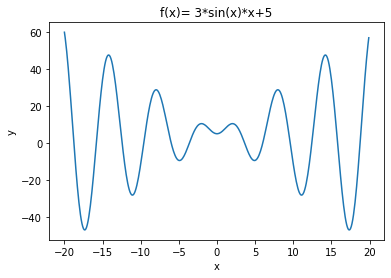

In [189]:
plt.plot (xlist.detach().numpy(), ylist.detach().numpy())
plt.title("f(x)= 3*sin(x)*x+5")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

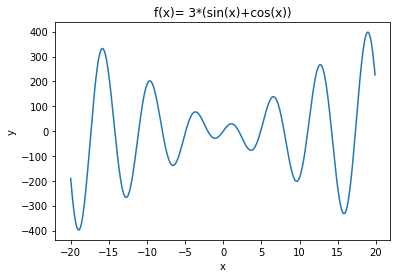

In [198]:
[f(i).backward() for i in xlist]
xlist.grad

plt.plot (xlist.detach().numpy(), xlist.grad)
plt.title("f(x)= 3*(sin(x)+cos(x))")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Задание 3 (scipy + matplotlib)

Дано две функции:

\begin{matrix} F(x) = a_{11}x^2 + a_{12}x + a_{13}&(1) \\ P(x) = a_{21}x^2+a_{22}x + a_{23} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты $a$.
* Необходимо найти точки экстремума функций (например, через функцию `minimize_scalar()` или `fmin()`) и определить, есть ли у функций общие решения при введенных коэффициентах на некотором диапазоне значений $x$, предусмотрев ситуации, когда решение есть, решений нет и решений бесконечно много. Ответ вывести. В случае, если решения есть (или их бесконечно много), необходимо построить график, на котором построены графики обеих функций, отмечены эти решения и экстремумы функций (другим цветом).


In [436]:
# line1 = input().split()
# line2 = input().split()
line1 = [1,4,-2]
line2 = [2,1,1]
a11, a12, a13 = [float(i) for i in line1]
a21, a22, a23 = [float(i) for i in line2]
f = lambda x:a11*x*x+a12*x+a13
p = lambda x:a21*x*x+a22*x+a23
delta = lambda x: f(x)-p(x)
f_x = np.arange(-5,5,0.5)
f_y = [f(i) for i in f_x]
p_x = np.arange(-5,5,0.5)
p_y = [p(i) for i in p_x]
delta_x = np.arange(-5,5,0.5)
delta_y = [delta(i) for i in delta_x]
a,b,c = np.asarray(line1)-np.asarray(line2)

In [394]:
f_min = optimize.minimize_scalar(f)
p_min = optimize.minimize_scalar(p)
delta_min = optimize.minimize_scalar(delta)
print(f_min.x, p_min.x, delta_min.x)

-2.0 -0.49999999259 -4.213382245223539e+16


In [430]:
def solve_square_equation(a,b,c):
  discr = b ** 2 - 4 * a * c
  if discr > 0:
    x1 = (-b + math.sqrt(discr)) / (2 * a)
    x2 = (-b - math.sqrt(discr)) / (2 * a)
    return x1,x2
  elif discr == 0:
      x = -b / (2 * a)
      return x, x
  else:
      return None, None

In [437]:
A = np.array([[a11, a12], [a21, a22]])
B = np.array([a13, a23])
x, y = np.linalg.solve(A, B)
if a!=0:
  x1,x2 = solve_square_equation(np.asarray(line1)-np.asarray(line2))
print(x1,x2,np.asarray(line1)-np.asarray(line2))
if x1 is not None:
  plt.xlabel("x")
  plt.ylabel("y")
  plt.scatter(f_min.x, f(f_min.x), color='red', s=40, marker='o')
  plt.scatter(p_min.x, p(p_min.x), color='red', s=40, marker='o')
  plt.plot(f_x, f_y)
  plt.plot(p_x, p_y)
  if line1==line2:
    plt.title(f"решений бесконечно много")
  else:
    pass
    plt.title(f"решение существует в точках\n {x1} {x2}")
    plt.scatter(x1, f(x1), color='orange', s=40, marker='o')
    plt.scatter(x2, f(x2), color='orange', s=40, marker='o')
  plt.show()
else:
  print('Решений нет')
    


0.8571428571428572 -0.7142857142857143
-1 3 -3
None None [-1  3 -3]
Решений нет
